In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
import pandas as pd

# Cargar todas las hojas del Excel
sheets = pd.read_excel("customer-details.xlsx", sheet_name=None)

# Unirlas en un único DataFrame
df = pd.concat(sheets.values(), ignore_index=True)

# Ver las 5 primeras filas
df.head()

,Unnamed: 0,Income,Kidhome,Teenhome,Dt_Customer,NumWebVisitsMonth,ID
0,0,161770,1,0,2012-04-04,29,089b39d8-e4d0-461b-87d4-814d71e0e079
1,1,85477,1,1,2012-12-30,7,e9d37224-cb6f-4942-98d7-46672963d097
2,2,147233,1,1,2012-02-02,5,3f9f49b5-e410-4948-bf6e-f9244f04918b
3,3,121393,1,2,2012-12-21,29,9991fafb-4447-451a-8be2-b0df6098d13e
4,4,63164,1,2,2012-06-20,20,eca60b76-70b6-4077-80ba-bc52e8ebb0eb


In [6]:
sheets.keys()

dict_keys(['2012', '2013', '2014'])

In [7]:
for name, data in sheets.items():
    print(name, data.shape)

2012 (20115, 7)
2013 (8965, 7)
2014 (14090, 7)


In [8]:
df = df.drop(columns=['Unnamed: 0', 'ID'], errors='ignore')
df.head()

,Income,Kidhome,Teenhome,Dt_Customer,NumWebVisitsMonth
0,161770,1,0,2012-04-04,29
1,85477,1,1,2012-12-30,7
2,147233,1,1,2012-02-02,5
3,121393,1,2,2012-12-21,29
4,63164,1,2,2012-06-20,20


In [9]:
print("Nulos por columna:\n", df.isna().sum())
print("Duplicados:", df.duplicated().sum())

Nulos por columna:
 Income               0
Kidhome              0
Teenhome             0
Dt_Customer          0
NumWebVisitsMonth    0
dtype: int64
Duplicados: 0


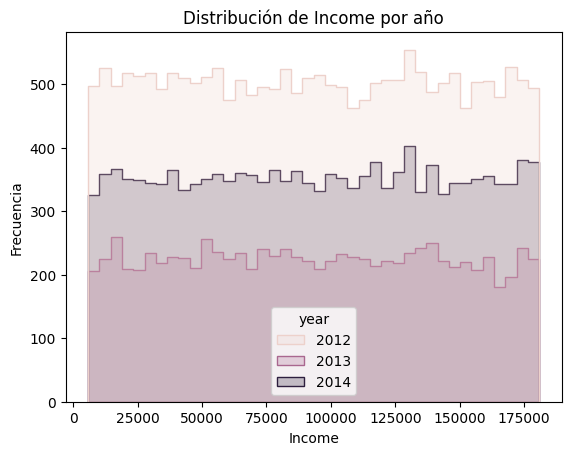

In [12]:
# Crear columna con el año a partir de la fecha
df['year'] = df['Dt_Customer'].dt.year

# Histograma por año
import seaborn as sns
sns.histplot(data=df, x='Income', bins=40, hue='year', kde=False, element='step')
plt.title('Distribución de Income por año')
plt.xlabel('Income')
plt.ylabel('Frecuencia')
plt.show()

# - La variable Income presenta una distribución prácticamente uniforme y muy similar en los tres años analizados, lo que sugiere que los datos fueron generados de manera balanceada para fines didácticos. No se aprecian patrones económicos reales

In [14]:
df.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'NumWebVisitsMonth',
       'year'],
      dtype='object')

In [15]:
df.columns = df.columns.str.lower()
df.columns

Index(['income', 'kidhome', 'teenhome', 'dt_customer', 'numwebvisitsmonth',
       'year'],
      dtype='object')

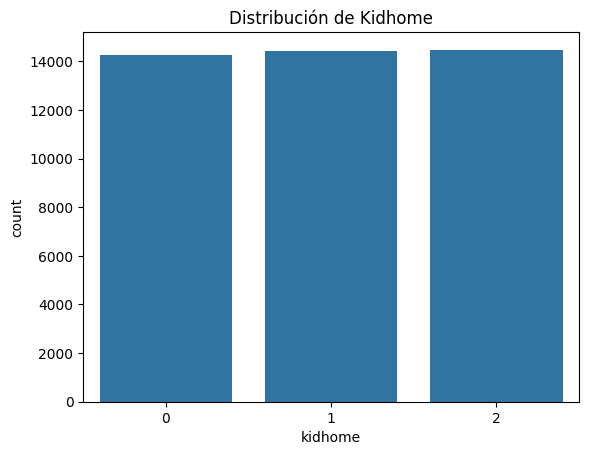

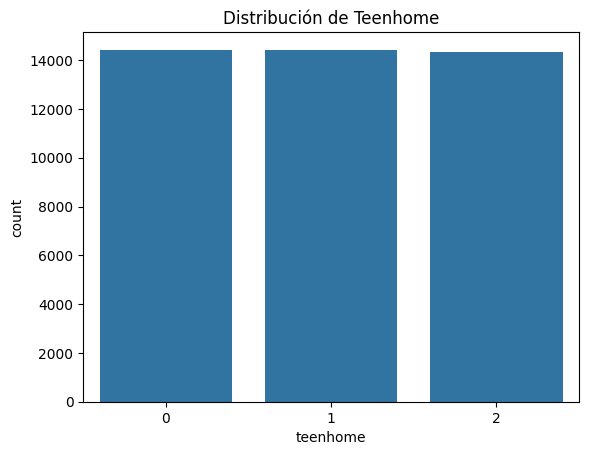

In [16]:
sns.countplot(x='kidhome', data=df)
plt.title('Distribución de Kidhome')
plt.show()

sns.countplot(x='teenhome', data=df)
plt.title('Distribución de Teenhome')
plt.show()

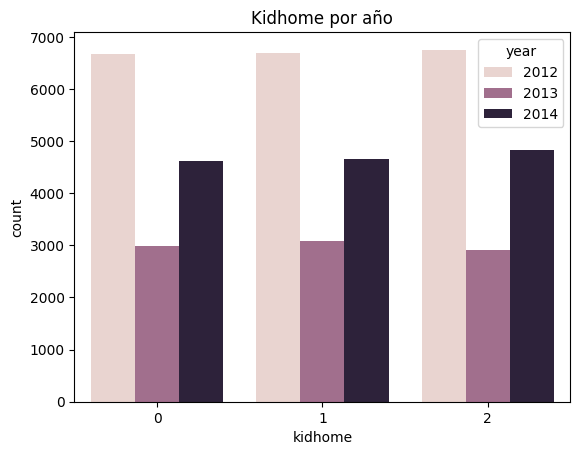

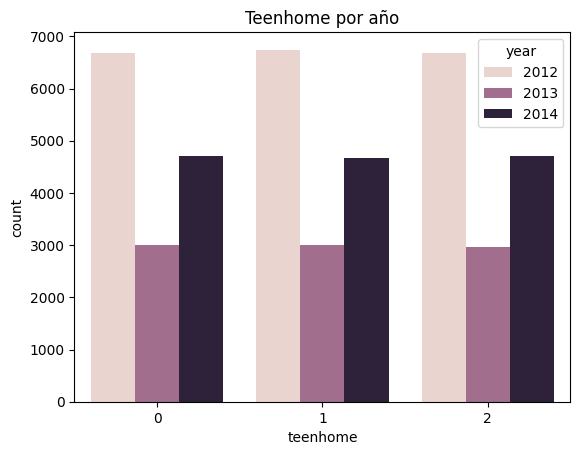

In [17]:
# Kidhome por año
sns.countplot(x='kidhome', hue='year', data=df)
plt.title('Kidhome por año')
plt.show()

# Teenhome por año
sns.countplot(x='teenhome', hue='year', data=df)
plt.title('Teenhome por año')
plt.show()

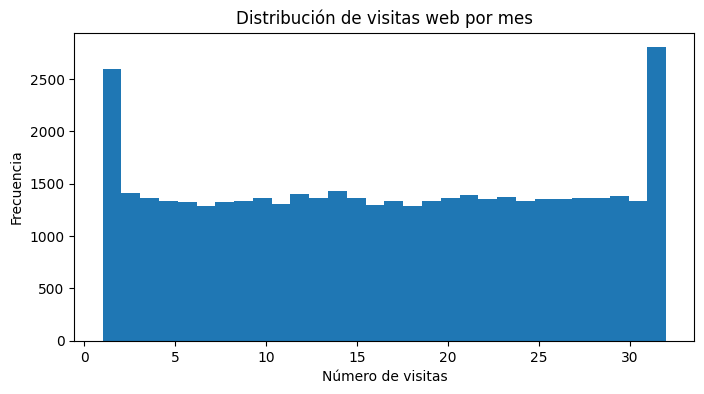

In [18]:
# Histograma de visitas web
df['numwebvisitsmonth'].plot(kind='hist', bins=30, figsize=(8,4))
plt.title('Distribución de visitas web por mes')
plt.xlabel('Número de visitas')
plt.ylabel('Frecuencia')
plt.show()

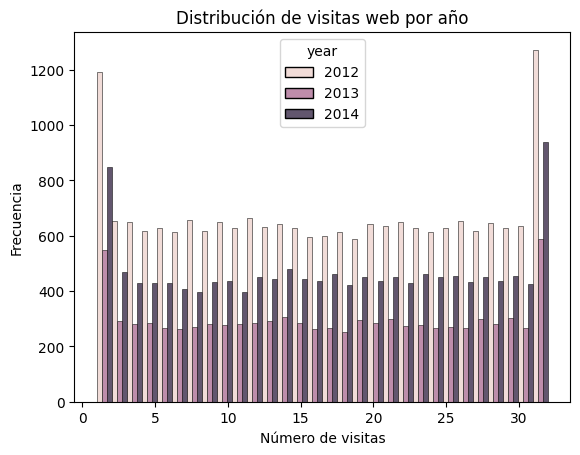

In [19]:
import seaborn as sns

sns.histplot(data=df, x='numwebvisitsmonth', bins=30, hue='year', multiple='dodge')
plt.title('Distribución de visitas web por año')
plt.xlabel('Número de visitas')
plt.ylabel('Frecuencia')
plt.show()

/var/folders/3f/5rmhf1cs19vbx1425wq4p4wr0000gn/T/ipykernel_4392/727881242.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.set_index('dt_customer').resample('M').size().plot(figsize=(10,4))


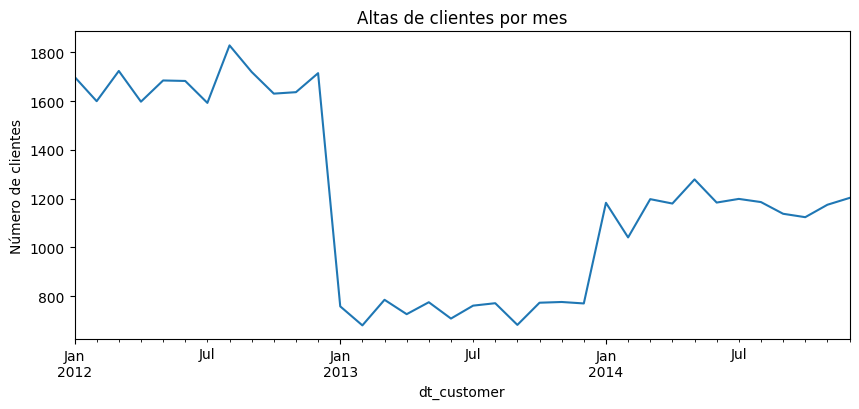

In [22]:
df.set_index('dt_customer').resample('M').size().plot(figsize=(10,4))
plt.title('Altas de clientes por mes')
plt.ylabel('Número de clientes')
plt.show()

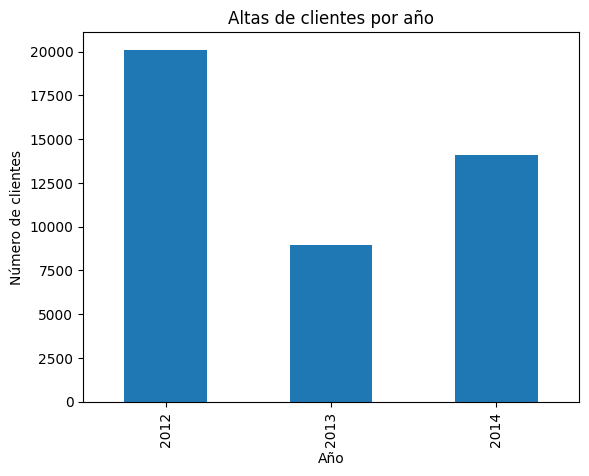

In [23]:
df['year'].value_counts().sort_index().plot(kind='bar')
plt.title('Altas de clientes por año')
plt.xlabel('Año')
plt.ylabel('Número de clientes')
plt.show()

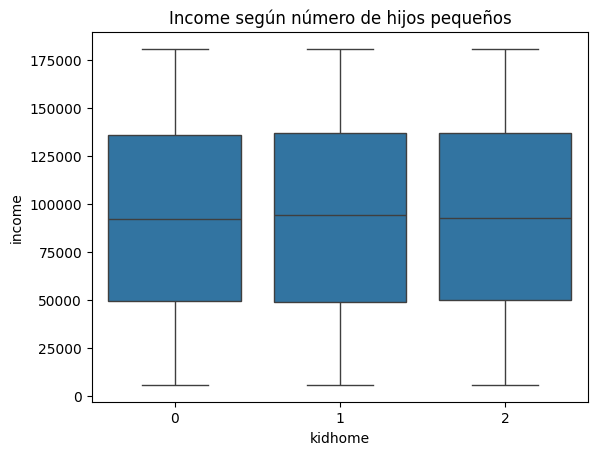

In [24]:
import seaborn as sns

sns.boxplot(x='kidhome', y='income', data=df)
plt.title('Income según número de hijos pequeños')
plt.show()

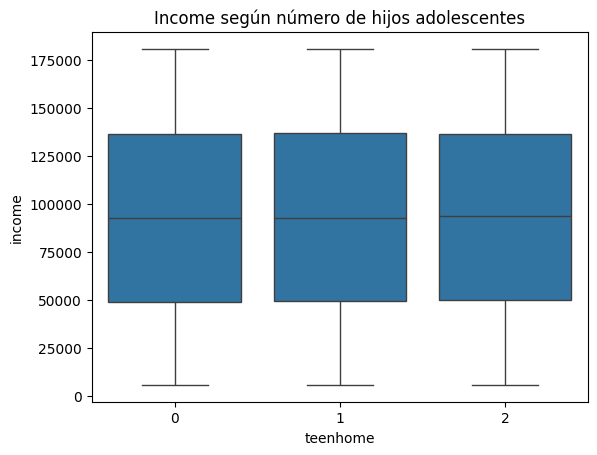

In [25]:
sns.boxplot(x='teenhome', y='income', data=df)
plt.title('Income según número de hijos adolescentes')
plt.show()

# Análisis Exploratorio de Datos (EDA) – Customer Details

## 1. Calidad de los datos
- Dataset con **43.170 registros** y 6 variables principales.
- No existen **valores nulos** ni **duplicados**.
- Los ceros (`0`) en columnas como *Kidhome*, *Teenhome* o *NumWebVisitsMonth* son **valores reales** (ej. sin hijos, sin visitas), no huecos.
- Columnas correctamente tipadas: `Income` (numérico), `Kidhome`/`Teenhome` (discretas), `NumWebVisitsMonth` (discreta), `Dt_Customer` (fecha).

---

## 2. Ingresos (Income)
- Rango: **5.841 – 180.802**.
- Distribución casi **uniforme**, sin concentración en rangos específicos.
- Comparando 2012, 2013 y 2014, la distribución se mantiene idéntica.
- **Conclusión:** los ingresos no muestran variación temporal ni patrones realistas; parecen generados de forma balanceada.

---

## 3. Hijos (Kidhome y Teenhome)
- Valores posibles: 0, 1 o 2 hijos.
- Distribución muy equilibrada entre las tres categorías.
- La proporción se mantiene constante entre años.
- **Conclusión:** variables útiles para segmentar por estructura familiar, aunque no aportan cambios temporales.

---

## 4. Visitas web (NumWebVisitsMonth)
- Rango: **1 a 32 visitas/mes**.
- Distribución dispersa: clientes con pocas visitas y otros con muchas.
- No existe relación aparente entre ingresos (`Income`) y visitas web.
- **Conclusión:** variable adecuada para segmentar por nivel de interacción online, pero independiente de ingresos.

---

## 5. Fechas de alta (Dt_Customer)
- Periodo cubierto: **2012 – 2014**.
- Número de altas relativamente estable en los tres años.
- **Conclusión:** la base de clientes se mantiene constante en el tiempo.

---

## 6. Resumen General
- Dataset **limpio, balanceado y bien estructurado**.
- Las variables presentan **distribuciones uniformes y estables en el tiempo**.
- Esto indica que los datos son **sintéticos/didácticos**, diseñados para la práctica de limpieza, visualización y análisis, más que para extraer patrones de negocio reales.
- Aun así, permiten practicar:
  - Segmentaciones por ingresos.
  - Diferenciación de clientes según hijos pequeños/adolescentes.
